## Day14 Keras Basic 

### Keras란 

#### Keras는 Theano와 TensorFlow를 백엔드(back-end)로 사용하는딥러닝 라이브러리. Torch에서 영감을 얻어 직관적 API를 제공. 

- Torch에서 영감을 얻은 직관적 API
- Theano와 작업 가능, TensorFlow와 Deeplearning4j 백엔드 (CNTK 백엔드 예정)
- 빠르게 성장하고 있는 프레임워크
- 신경망의 표준 Python API이 될 가능성이 큼

In [13]:
from keras.utils import np_utils

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [ ]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

In [ ]:
xTrain=xTrain.reshape(60000,784).astype('float')/255.0
xTest=xTest.reshape(10000,784).astype('float')/255.0

In [ ]:
xTrain

In [ ]:
xTrain.shape

In [ ]:
#숫자로 되어있는 카테고리형태 이기 때문에 원핫인코딩 시켜줌.
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [ ]:
model=Sequential()
model.add(Dense(16, input_dim=28*28, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(xTrain, yTrain, epochs=30, batch_size=16)

#epochs : 학습횟수
#batchsize: 몇개의 샘플로 가중치를 업데이트 시킬 것인가. batchsize가 크면 연산량을 모두 저장해야하기 때문에 메모리가 커야한다.


In [ ]:
print(hist.history['loss']) #히스토리 보기

In [ ]:
test_loss, accuracy=model.evaluate(xTest, yTest)
print(test_loss, accuracy)

In [ ]:
xhat=xTest[0:1]
res=model.predict(xhat)
print(res)

In [ ]:
yTest[0:1]

## Train/Validation data로 나눠 예측 

In [30]:
import numpy as np
np.random.seed(3)

(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [31]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [32]:
xVal=xTrain[50000:] #10000,28 28 (validation)
yVal=yTrain[50000:] #10000,

xTrain=xTrain[:50000] #50000,28,28 (train)
yTrain=yTrain[:50000] #50000,

xTrain=xTrain.reshape(50000,784).astype('float32')/255
xVal=xVal.reshape(10000,784).astype('float32')/255

xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [33]:
xTrain.shape

(50000, 784)

In [34]:
#훈련, 검증 데이터 선택

tri=np.random.choice(50000,700)
vri=np.random.choice(10000,300)

In [35]:
xTrain=xTrain[tri]
yTrain=yTrain[tri]

xVal=xVal[vri]
yVal=yVal[vri]


In [36]:
print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape)

(700, 784) (700,) (300, 784) (300,)


In [37]:
yTrain=np_utils.to_categorical(yTrain)
yVal=np_utils.to_categorical(yVal)


yTest=np_utils.to_categorical(yTest)

In [38]:
model=Sequential()
model.add(Dense(16, input_dim=28*28, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [39]:
hist0=model.fit(xTrain, yTrain, epochs=30, batch_size=16, validation_data=(xVal,yVal))

Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 [==============================] - 0s 323us/step - loss: 2.1555 - accuracy: 0.2357 - val_loss: 1.8463 - val_accuracy: 0.4533
Epoch 2/30
700/700 [==============================] - 0s 94us/step - loss: 1.2807 - accuracy: 0.6429 - val_loss: 0.9462 - val_accuracy: 0.7033
Epoch 3/30
700/700 [==============================] - 0s 93us/step - loss: 0.6373 - accuracy: 0.8000 - val_loss: 0.6520 - val_accuracy: 0.8033
Epoch 4/30
700/700 [==============================] - 0s 90us/step - loss: 0.4415 - accuracy: 0.8614 - val_loss: 0.6685 - val_accuracy: 0.8200
Epoch 5/30
700/700 [==============================] - 0s 93us/step - loss: 0.3322 - accuracy: 0.9014 - val_loss: 0.6239 - val_accuracy: 0.8133
Epoch 6/30
700/700 [==============================] - 0s 90us/step - loss: 0.2421 - accuracy: 0.9271 - val_loss: 0.6279 - val_accuracy: 0.8067
Epoch 7/30
700/700 [==============================] - 0s 89us/step - loss: 0.1663 - accuracy: 0

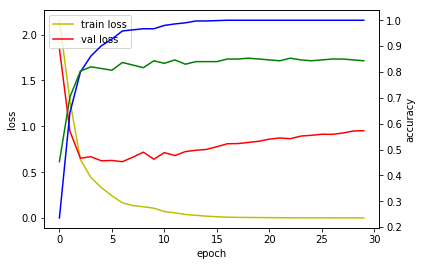

In [40]:
import matplotlib.pyplot as plt

figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist0.history['loss'],'y',label='train loss')
loss_ax.plot(hist0.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist0.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist0.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [41]:
res=model.evaluate(xTest, yTest, batch_size=32)

print('cost:'+str(res[0]))
print('accuracy:'+str(res[1]))

10000/10000 [==============================] - 0s 18us/step
cost:0.8086269483316689
accuracy:0.8598999977111816


### *Callbacks-earlystopping 줘서 Overfitting방지해보기

In [42]:
from keras.callbacks import EarlyStopping

In [44]:
es=EarlyStopping(monitor="val_loss", patience=10, mode="min")
hist0=model.fit(xTrain, yTrain, epochs=30, batch_size=16, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/30
700/700 [==============================] - 0s 130us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9588 - val_accuracy: 0.8467
Epoch 2/30
700/700 [==============================] - 0s 100us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9663 - val_accuracy: 0.8533
Epoch 3/30
700/700 [==============================] - 0s 86us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9703 - val_accuracy: 0.8533
Epoch 4/30
700/700 [==============================] - 0s 86us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9797 - val_accuracy: 0.8500
Epoch 5/30
700/700 [==============================] - 0s 87us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9924 - val_accuracy: 0.8467
Epoch 6/30
700/700 [==============================] - 0s 90us/step - loss: 9.9384e-04 - accuracy: 1.0000 - val_loss: 0.9935 - val_accuracy: 0.8533
Epoch 7/30
700/700 [==============================] - 0s 84us/step - loss: 9.2292e-04 - ac

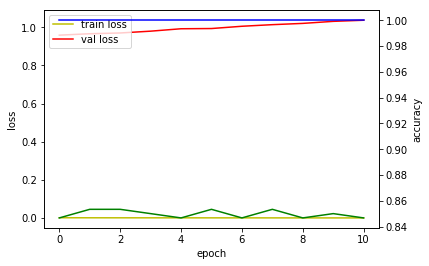

In [45]:
import matplotlib.pyplot as plt

figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist0.history['loss'],'y',label='train loss')
loss_ax.plot(hist0.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist0.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist0.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [46]:
res=model.evaluate(xTest, yTest, batch_size=32)

print('cost:'+str(res[0]))
print('accuracy:'+str(res[1])) #정확도가 0.1정도 조금 올라간것을 볼 수 있음.

10000/10000 [==============================] - 0s 19us/step
cost:0.8783686726214364
accuracy:0.8604999780654907


### Review 

In [84]:
xy=np.loadtxt('data-03-diabetes.csv', delimiter=',')
xdata=xy[:,:-1]
xdata.shape

ydata=xy[:,-1:]
ydata.shape

(759, 1)

In [85]:
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])

In [86]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [87]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted=tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [89]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_ = sess.run([cost,train], feed_dict={x:xdata,y:ydata})
        if step % 200 ==0:
            print(step,cv)
    hv,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print(hv,pv,av)

0 0.9435822
200 0.8373496
400 0.7837473
600 0.7436878
800 0.709809
1000 0.68051577
1200 0.65517825
1400 0.63331765
1600 0.6144899
1800 0.5982821
2000 0.58432025
2200 0.5722735
2400 0.5618544
2600 0.55281687
2800 0.5449517
3000 0.53808236
3200 0.53206056
3400 0.5267619
3600 0.5220819
3800 0.517933
4000 0.5142416
4200 0.51094544
4400 0.5079923
4600 0.5053378
4800 0.50294405
5000 0.5007793
5200 0.49881554
5400 0.4970295
5600 0.49540094
5800 0.49391216
6000 0.49254808
6200 0.49129522
6400 0.49014235
6600 0.48907912
6800 0.48809677
7000 0.48718765
7200 0.48634464
7400 0.48556173
7600 0.48483354
7800 0.48415512
8000 0.48352227
8200 0.4829311
8400 0.48237813
8600 0.48186043
8800 0.48137486
9000 0.48091927
9200 0.4804912
9400 0.48008847
9600 0.4797094
9800 0.47935215
10000 0.4790152
[[0.39010864]
 [0.9225323 ]
 [0.26998878]
 [0.93121004]
 [0.17823863]
 [0.7977799 ]
 [0.93637455]
 [0.6160972 ]
 [0.23108214]
 [0.56334996]
 [0.73017925]
 [0.18760905]
 [0.32343656]
 [0.20708174]
 [0.772463  ]
 [0.

## Practice.1 

- 삼성전자 주식 데이터 다운로드
- 제공되는 데이터(약 3년)
- 4개의 입력변수 -> 1개의 출력변수(close)
- 데이터 train/test로 나눠서 예측
- 최근 1개월 데이터로 테스트

In [325]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
# 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code
# excel 파일을 다운로드하는거와 동시에 pandas에 load하기
# 흔히 사용하는 df라는 변수는 data frame을 의미합니다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
# 종목코드는 6자리로 구분되기때문에 0을 채워 6자리로 변경
code_df.code = code_df.code.map('{:06d}'.format)
# ex) 삼성전자의의 코드를 구해보겠습니다.
code = get_code(code_df, '삼성전자')
# yahoo의 주식 데이터 종목은 코스피는 .KS, 코스닥은 .KQ가 붙습니다.
# 삼성전자의 경우 코스피에 상장되어있기때문에 '종목코드.KS'로 처리하도록 한다.
code = code + '.KS'
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df = pdr.get_data_yahoo(code)


In [326]:
stock=df.iloc[:1197,:]
stock #약 5년치 주식데이터

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,28960.0,28460.0,28920.0,28600.0,12394900.0,277.353668
2015-04-21,28900.0,28400.0,28420.0,28880.0,11852650.0,280.069031
2015-04-22,29460.0,28720.0,28880.0,29220.0,12655550.0,283.366241
2015-04-23,29400.0,28800.0,29400.0,29020.0,9245150.0,281.426697
2015-04-24,29100.0,28000.0,28980.0,28200.0,19089900.0,273.474609
...,...,...,...,...,...,...
2020-03-06,57200.0,56200.0,56500.0,56500.0,18716656.0,56500.000000
2020-03-09,56500.0,56500.0,56500.0,56500.0,0.0,56500.000000
2020-03-10,54900.0,53700.0,53800.0,54600.0,32106554.0,54600.000000


In [327]:
stock_df=stock.drop(['Adj Close'], axis=1, inplace=False)

In [328]:
stock_df

,High,Low,Open,Close,Volume
Date,,,,,
2015-04-20,28960.0,28460.0,28920.0,28600.0,12394900.0
2015-04-21,28900.0,28400.0,28420.0,28880.0,11852650.0
2015-04-22,29460.0,28720.0,28880.0,29220.0,12655550.0
2015-04-23,29400.0,28800.0,29400.0,29020.0,9245150.0
2015-04-24,29100.0,28000.0,28980.0,28200.0,19089900.0
...,...,...,...,...,...
2020-03-06,57200.0,56200.0,56500.0,56500.0,18716656.0
2020-03-09,56500.0,56500.0,56500.0,56500.0,0.0
2020-03-10,54900.0,53700.0,53800.0,54600.0,32106554.0


In [329]:
stock_X=stock_df.loc[:,['High','Low','Open','Volume']]
stock_Y=stock_df.loc[:,['Close']]

In [330]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit_transform(stock_X)

array([[0.18102614, 0.19005848, 0.18602362, 0.19163035],
       [0.17957406, 0.18859649, 0.17372047, 0.18324694],
       [0.19312682, 0.19639376, 0.18503937, 0.19566011],
       ...,
       [0.80880929, 0.80506823, 0.79822835, 0.49638078],
       [0.79670862, 0.76364522, 0.8105315 , 0.70665372],
       [0.7410455 , 0.76608187, 0.75639764, 0.        ]])

In [331]:
stock_Y

,Close
Date,
2015-04-20,28600.0
2015-04-21,28880.0
2015-04-22,29220.0
2015-04-23,29020.0
2015-04-24,28200.0
...,...
2020-03-06,56500.0
2020-03-09,56500.0
2020-03-10,54600.0


In [333]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(stock_X, stock_Y, train_size=0.7, shuffle=False)

In [334]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(837, 4) (360, 4) (837, 1) (360, 1)


In [335]:
model=Sequential()
model.add(Dense(16, input_shape=(xtrain.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [336]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [337]:
hist=model.fit(xtrain, ytrain, epochs=100, batch_size=8)

Epoch 1/100
837/837 [==============================] - 1s 670us/step - loss: 25021915574.3274 - mae: 78663.8828
Epoch 2/100
837/837 [==============================] - 0s 281us/step - loss: 1111882435.5173 - mae: 24507.2129
Epoch 3/100
837/837 [==============================] - 0s 250us/step - loss: 531482905.8065 - mae: 17847.7090
Epoch 4/100
837/837 [==============================] - 0s 245us/step - loss: 536175022.4898 - mae: 17616.7949
Epoch 5/100
837/837 [==============================] - 0s 260us/step - loss: 573703367.3405 - mae: 17955.7871
Epoch 6/100
837/837 [==============================] - 0s 257us/step - loss: 1258643111.3405 - mae: 25817.6660
Epoch 7/100
837/837 [==============================] - 0s 257us/step - loss: 831468024.8889 - mae: 21260.8105
Epoch 8/100
837/837 [==============================] - 0s 256us/step - loss: 727508790.6714 - mae: 19972.4961
Epoch 9/100
837/837 [==============================] - 0s 260us/step - loss: 508518679.8566 - mae: 16779.4316
Epoch 

837/837 [==============================] - 0s 249us/step - loss: 14796817.0096 - mae: 2678.8621
Epoch 77/100
837/837 [==============================] - 0s 240us/step - loss: 40989117.1868 - mae: 5029.4971
Epoch 78/100
837/837 [==============================] - 0s 243us/step - loss: 16706536.5932 - mae: 2788.7476
Epoch 79/100
837/837 [==============================] - 0s 251us/step - loss: 5764144.6779 - mae: 1582.7145
Epoch 80/100
837/837 [==============================] - 0s 251us/step - loss: 6262748.5472 - mae: 1334.4478
Epoch 81/100
837/837 [==============================] - 0s 247us/step - loss: 5194922.7810 - mae: 1506.4258
Epoch 82/100
837/837 [==============================] - 0s 247us/step - loss: 2117093.3242 - mae: 962.0643
Epoch 83/100
837/837 [==============================] - 0s 247us/step - loss: 2517203.3273 - mae: 863.0537
Epoch 84/100
837/837 [==============================] - 0s 246us/step - loss: 2409309.1584 - mae: 1076.3367
Epoch 85/100
837/837 [==================

In [ ]:
res=model.evaluate(xtest, ytest, batch_size=8)

print('loss: ' + str(res[0]))
print('mae: ' +str(res[1]))

In [339]:
pred=model.predict(xtest)

In [340]:
pred

array([[45101.74 ],
       [46992.367],
       [46945.004],
       [47085.01 ],
       [46383.246],
       [45601.027],
       [45571.137],
       [44896.56 ],
       [44358.62 ],
       [43804.207],
       [44434.715],
       [44183.582],
       [43709.094],
       [43101.21 ],
       [43022.05 ],
       [43463.043],
       [43257.527],
       [43142.105],
       [42745.285],
       [42412.457],
       [42869.55 ],
       [41224.55 ],
       [41077.234],
       [41249.465],
       [41887.26 ],
       [42893.254],
       [42588.03 ],
       [43595.74 ],
       [42754.293],
       [42801.66 ],
       [43607.207],
       [44751.83 ],
       [43671.98 ],
       [43434.574],
       [43155.266],
       [43547.887],
       [43623.4  ],
       [43196.266],
       [41843.33 ],
       [41665.15 ],
       [41579.824],
       [41606.137],
       [41663.992],
       [42027.24 ],
       [42227.895],
       [42710.17 ],
       [43331.035],
       [42931.74 ],
       [42591.07 ],
       [41217.13 ],


In [342]:
actual=ytest.copy()

In [343]:
actual

,Close
Date,
2018-09-19,46150.0
2018-09-20,47250.0
2018-09-21,47400.0
2018-09-27,47500.0
2018-09-28,46450.0
...,...
2020-03-06,56500.0
2020-03-09,56500.0
2020-03-10,54600.0


In [344]:
ytest['Close']=pred

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [345]:
ytest

,Close
Date,
2018-09-19,45101.738281
2018-09-20,46992.367188
2018-09-21,46945.003906
2018-09-27,47085.011719
2018-09-28,46383.246094
...,...
2020-03-06,56766.691406
2020-03-09,59123.832031
2020-03-10,55138.621094


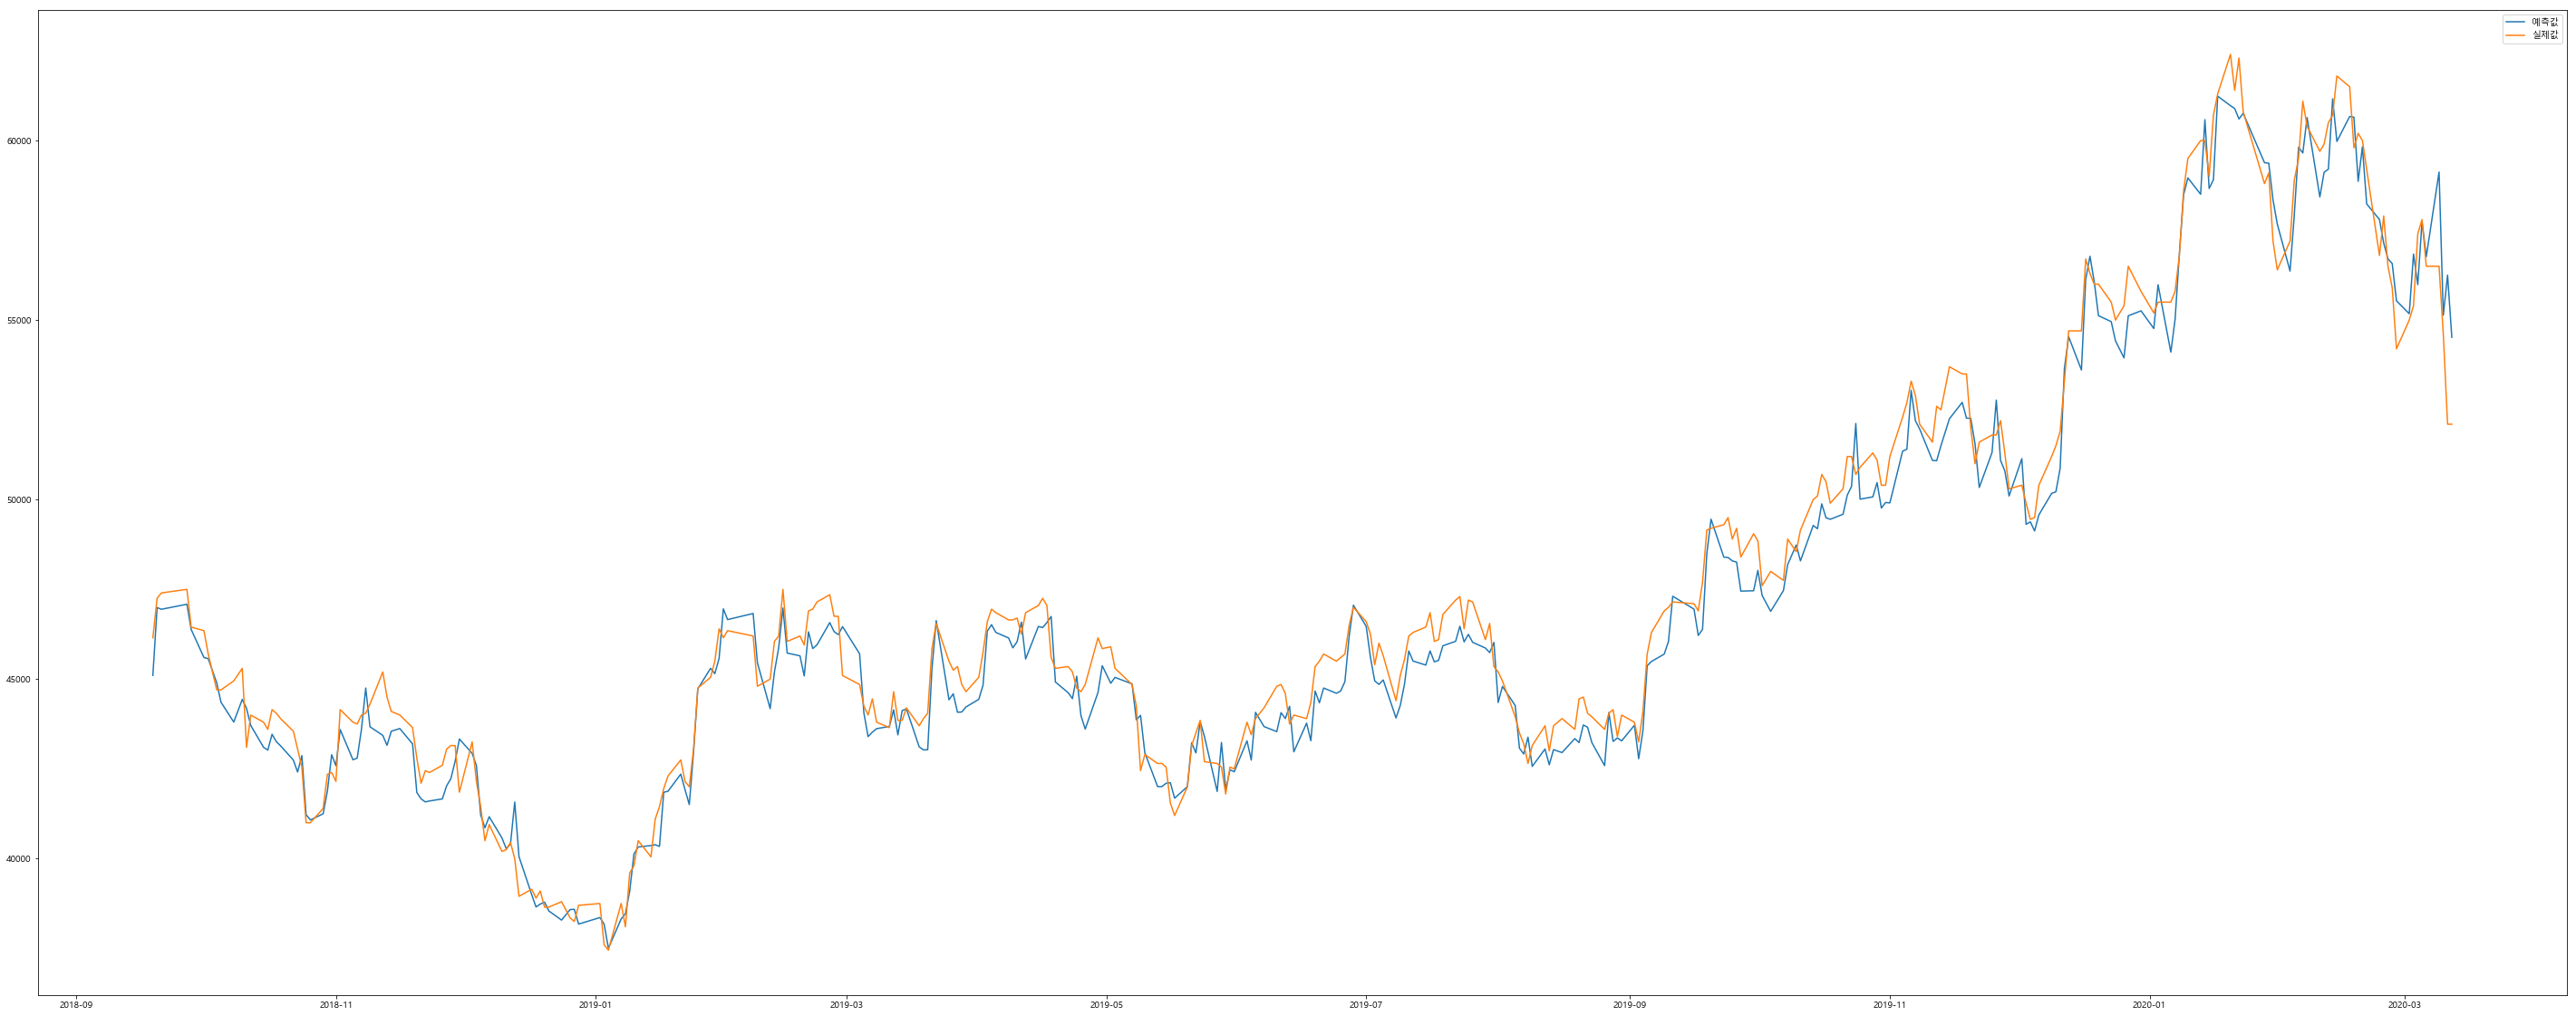

In [365]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(50,20))
plt.plot(ytest, label='예측값')
plt.plot(actual, label='실제값')
plt.legend()

In [348]:
#예측값과 실제값의 오차
diff=ytest-actual

In [349]:
diff

,Close
Date,
2018-09-19,-1048.261719
2018-09-20,-257.632812
2018-09-21,-454.996094
2018-09-27,-414.988281
2018-09-28,-66.753906
...,...
2020-03-06,266.691406
2020-03-09,2623.832031
2020-03-10,538.621094


## Practice.2

In [371]:
trees=pd.read_csv('trees.csv', header=0)

In [372]:
trees

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [374]:
x_trees=trees.iloc[:,:2]
y_trees=trees.iloc[:,-1:]

In [377]:
xtrain, xtest, ytrain, ytest= train_test_split(x_trees, y_trees, train_size=0.7, shuffle=True)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(21, 2) (10, 2) (21, 1) (10, 1)


In [417]:
model=Sequential()
model.add(Dense(8, input_shape=(xtrain.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [418]:
hist_t=model.fit(xtrain, ytrain, epochs=300, batch_size=8)

Epoch 1/300
21/21 [==============================] - 0s 19ms/step - loss: 1339.6864 - mae: 32.8085
Epoch 2/300
21/21 [==============================] - 0s 522us/step - loss: 1197.5242 - mae: 30.7003
Epoch 3/300
21/21 [==============================] - 0s 429us/step - loss: 1051.6857 - mae: 28.3663
Epoch 4/300
21/21 [==============================] - 0s 476us/step - loss: 932.3577 - mae: 26.2643
Epoch 5/300
21/21 [==============================] - 0s 523us/step - loss: 829.4889 - mae: 24.3294
Epoch 6/300
21/21 [==============================] - 0s 476us/step - loss: 732.9218 - mae: 22.2914
Epoch 7/300
21/21 [==============================] - 0s 477us/step - loss: 638.6866 - mae: 20.1216
Epoch 8/300
21/21 [==============================] - 0s 478us/step - loss: 550.8967 - mae: 17.8223
Epoch 9/300
21/21 [==============================] - 0s 523us/step - loss: 462.7936 - mae: 15.3551
Epoch 10/300
21/21 [==============================] - 0s 524us/step - loss: 387.0987 - mae: 12.8155
Epoch 1

21/21 [==============================] - 0s 429us/step - loss: 194.3667 - mae: 11.2892
Epoch 83/300
21/21 [==============================] - 0s 428us/step - loss: 193.3350 - mae: 11.4073
Epoch 84/300
21/21 [==============================] - 0s 476us/step - loss: 193.1718 - mae: 11.3789
Epoch 85/300
21/21 [==============================] - 0s 428us/step - loss: 193.1313 - mae: 11.3515
Epoch 86/300
21/21 [==============================] - 0s 476us/step - loss: 193.0792 - mae: 11.3083
Epoch 87/300
21/21 [==============================] - 0s 524us/step - loss: 192.3331 - mae: 11.2100
Epoch 88/300
21/21 [==============================] - 0s 476us/step - loss: 192.3719 - mae: 11.1209
Epoch 89/300
21/21 [==============================] - 0s 428us/step - loss: 191.7011 - mae: 11.0056
Epoch 90/300
21/21 [==============================] - 0s 429us/step - loss: 192.5028 - mae: 10.9852
Epoch 91/300
21/21 [==============================] - 0s 476us/step - loss: 191.5528 - mae: 11.0056
Epoch 92/300


21/21 [==============================] - 0s 524us/step - loss: 166.8308 - mae: 10.1732
Epoch 164/300
21/21 [==============================] - 0s 524us/step - loss: 166.5944 - mae: 10.1700
Epoch 165/300
21/21 [==============================] - 0s 476us/step - loss: 166.1133 - mae: 10.1735
Epoch 166/300
21/21 [==============================] - 0s 524us/step - loss: 164.9421 - mae: 10.2056
Epoch 167/300
21/21 [==============================] - 0s 476us/step - loss: 165.4408 - mae: 10.4252
Epoch 168/300
21/21 [==============================] - 0s 476us/step - loss: 164.6031 - mae: 10.5183
Epoch 169/300
21/21 [==============================] - 0s 476us/step - loss: 163.6687 - mae: 10.4746
Epoch 170/300
21/21 [==============================] - 0s 428us/step - loss: 163.2526 - mae: 10.3277
Epoch 171/300
21/21 [==============================] - 0s 429us/step - loss: 162.6834 - mae: 10.2078
Epoch 172/300
21/21 [==============================] - 0s 381us/step - loss: 163.2316 - mae: 10.1638
Epoc

Epoch 245/300
21/21 [==============================] - 0s 429us/step - loss: 72.9639 - mae: 6.7046
Epoch 246/300
21/21 [==============================] - 0s 476us/step - loss: 76.3944 - mae: 7.0389
Epoch 247/300
21/21 [==============================] - 0s 571us/step - loss: 73.6844 - mae: 6.9012
Epoch 248/300
21/21 [==============================] - 0s 476us/step - loss: 70.6681 - mae: 6.4362
Epoch 249/300
21/21 [==============================] - 0s 476us/step - loss: 66.5711 - mae: 6.1714
Epoch 250/300
21/21 [==============================] - 0s 476us/step - loss: 65.9476 - mae: 6.3638
Epoch 251/300
21/21 [==============================] - 0s 476us/step - loss: 64.7246 - mae: 6.3028
Epoch 252/300
21/21 [==============================] - 0s 476us/step - loss: 62.3349 - mae: 6.0679
Epoch 253/300
21/21 [==============================] - 0s 429us/step - loss: 60.5112 - mae: 5.8911
Epoch 254/300
21/21 [==============================] - 0s 428us/step - loss: 60.0491 - mae: 5.7226
Epoch 255/

In [419]:
res=model.evaluate(xtest, ytest, batch_size=8)

print('loss: ' + str(res[0]))
print('mae: ' +str(res[1]))

10/10 [==============================] - 0s 30ms/step
loss: 28.5558039188385
mae: 4.710719585418701


In [420]:
pred=model.predict(xtest)

In [421]:
pred #예측값-실제값

array([[15.599878],
       [20.828175],
       [31.442568],
       [45.08131 ],
       [16.15512 ],
       [47.50257 ],
       [16.614016],
       [48.067226],
       [22.21422 ],
       [20.626831]], dtype=float32)

In [422]:
pred-ytest#예측값-실제값

,Volume
0,5.299878
5,1.128175
20,-3.057432
23,6.781310
1,5.855121
25,-7.897429
2,6.414016
26,-7.632774
11,1.214220
4,1.826831


In [ ]:
# 0  5.299878
# 5  1.128175
# 20  -3.057432
# 23  6.781310
# 1  5.855121
# 25  -7.897429
# 2  6.414016
# 26  -7.632774
# 11  1.214220
# 4  1.826831